# Cleaning & Normalization
---

## Remove useless column

In [135]:
import pandas as pd

df = pd.read_csv("../data/raw_data.csv")
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


## Handle missing values 

In [136]:
import numpy as np
from sklearn.impute import KNNImputer
import numpy as np

cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

df.isnull().sum()
# df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].var()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

## Detect outliers IQR

In [137]:
numeric_cols = df.select_dtypes(include=['number']).columns

outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df.loc[(df[col] < lower_limit) | (df[col] > upper_limit), col] = np.nan

df.isnull().sum()



Pregnancies                   4
Glucose                       5
BloodPressure                49
SkinThickness               230
Insulin                     398
BMI                          19
DiabetesPedigreeFunction     29
Age                           9
dtype: int64

## KNN Imputation for Missing Values

In [138]:
# df['Glucose'].fillna(df['Glucose'].median(), inplace=True)
# df['BMI'].fillna(df['BMI'].median(), inplace=True)
# df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace=True)

numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

numeric_df = df[numeric_cols]

imputer = KNNImputer(n_neighbors=5)

imputed_data = imputer.fit_transform(numeric_df)

df[numeric_cols] = pd.DataFrame(imputed_data, columns=numeric_cols)

## standardize numerical features.

In [139]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=['number']).columns

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.671008,0.866319,-0.006738,0.671668,0.566821,0.221010,0.802700,1.548902
1,-0.854732,-1.200646,-0.551449,-0.003369,-1.199918,-0.865349,-0.320802,-0.167395
2,1.281304,2.014633,-0.733019,0.019132,0.496408,-1.377489,0.985880,-0.077064
3,-0.854732,-1.069410,-0.551449,-0.678407,-0.633409,-0.632557,-1.069803,-1.070710
4,-1.159880,0.505421,-2.911863,0.671668,0.550818,1.695354,0.094405,0.013267
...,...,...,...,...,...,...,...,...
763,1.891600,-0.675702,0.356403,2.134249,0.742855,0.112374,-1.053521,2.723211
764,-0.549584,0.013286,-0.188308,-0.228382,0.502809,0.717631,-0.365579,-0.528721
765,0.365860,-0.019523,-0.006738,-0.678407,-0.345354,-0.927426,-0.752292,-0.257727
766,-0.854732,0.144522,-1.096160,0.694169,0.009914,-0.322169,-0.328943,1.277908


## Save the clean data

In [140]:
file_path = '../data/clean_data.csv' 

df.to_csv(
    file_path, 
    index=False, 
    encoding='utf-8' 
)

print(f"DataFrame successfully saved to {file_path}")

DataFrame successfully saved to ../data/clean_data.csv


## Visualize relationships with pairplots.

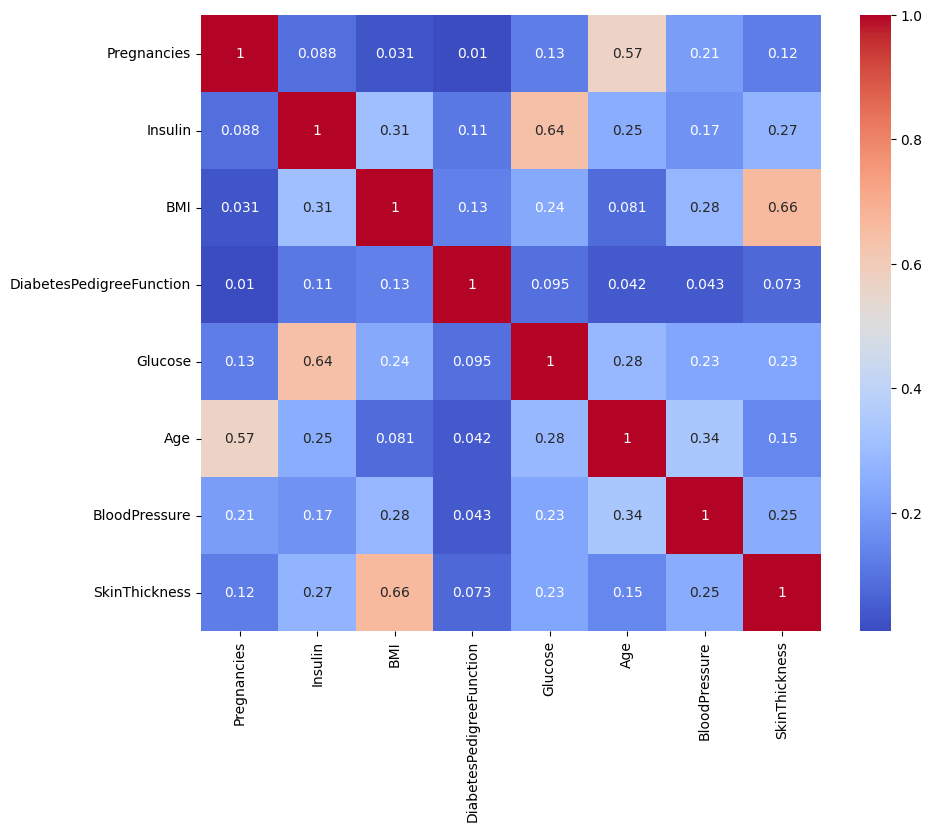

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df[[
    'Pregnancies',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction', 
    'Glucose',
    'Age',
    'BloodPressure',
    'SkinThickness'
        ]]

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()